In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm
from sklearn.cluster import KMeans
from initialization import K_means

**1-D data points**

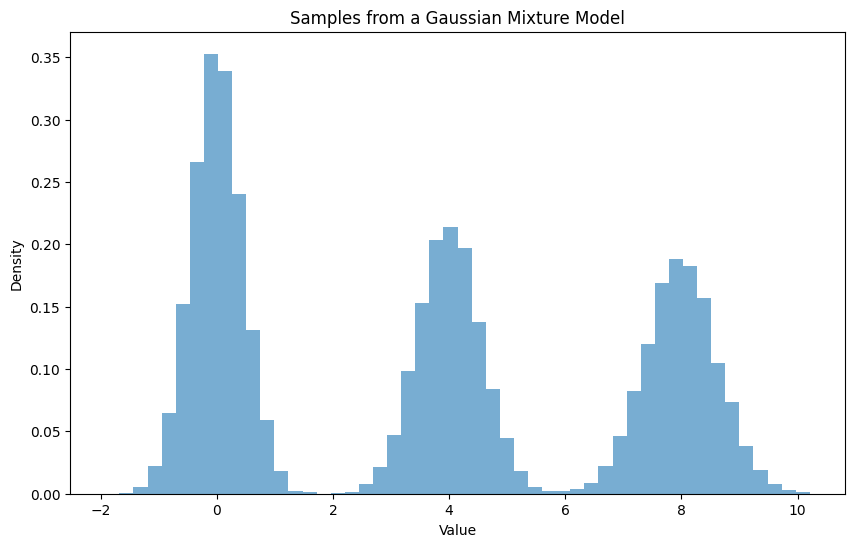

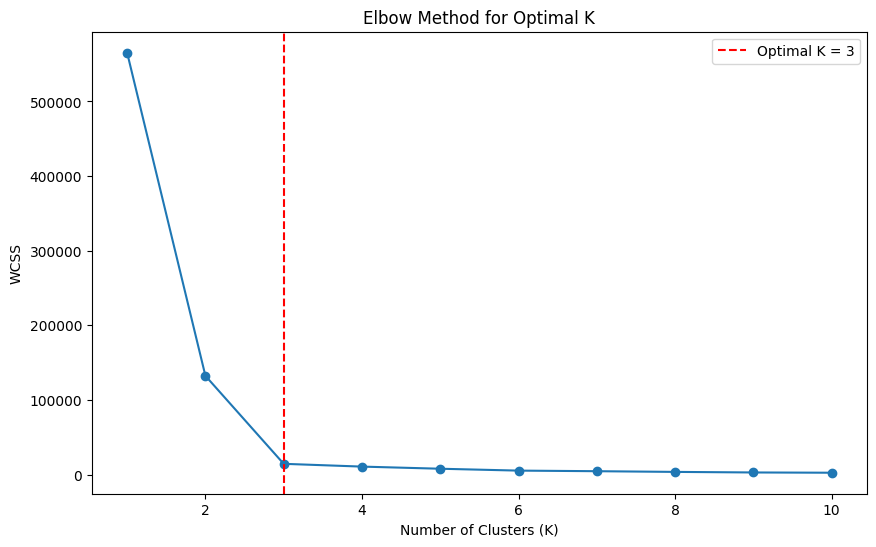

Optimal number of clusters (K): 3
miu: [[-1.24636166e-03]
 [ 7.99471122e+00]
 [ 3.99905601e+00]]
Variance: [0.19890724 0.39550151 0.29857581]
pi: [0.40165336 0.29837676 0.29996988]


In [5]:
means = [0.0, 4.0, 8,0]      # Means of the Gaussians
variances = [0.2, 0.3, 0.4]   # Variances
weights = [0.4, 0.3, 0.3]     # Mixing weights (must sum to 1)


n_samples = 50000
samples = []

for _ in range(n_samples):
    k = np.random.choice(len(weights), p=weights)
    sample = np.random.normal(means[k], np.sqrt(variances[k]))
    if sample not in samples:
        samples.append(sample)
    

samples = np.array(samples)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6)
plt.title("Samples from a Gaussian Mixture Model")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()     


means,clusters = K_means(samples.reshape(-1,1))


# wcss = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(samples.reshape(-1, 1)) 
#     wcss.append(kmeans.inertia_)  # WCSS

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), wcss, marker='o')
# plt.title("Elbow Method for Optimal K")
# plt.xlabel("Number of Clusters (K)")
# plt.ylabel("WCSS")
# plt.show()

# miu = np.array([0.1, 0.3, 0.5])  # Initial means
# i = 0
# while i < 10:  # K-means iterations
#     m1, m2, m3,  = [], [], []
#     for x in samples:
#         d0 = (x - miu[0])**2
#         d1 = (x - miu[1])**2
#         d2 = (x - miu[2])**2


#         if d0 < d1 and d0 < d2 :
#             m1.append(x)
#         elif d1 < d0 and d1 < d2 :
#             m2.append(x)

#         else:
#             m3.append(x)        
#     # Update means (skip empty clusters)
#     new_miu = []
#     for m in [m1, m2, m3]:
#         if len(m) > 0:
#             new_miu.append(np.mean(m))
#         else:
#             new_miu.append(np.random.uniform(0, 1))  # Reinitialize if empty
#     miu = np.array(new_miu)
#     i += 1

# print("Final means after K-means:", miu)

# # After K-means, we have three clusters with their means
# plt.figure(figsize=(10, 6))
# plt.plot(np.array(m1), np.zeros(len(m1)), 'r.', markersize=2, label='Cluster 1')
# plt.plot(np.array(m2), np.zeros(len(m2)), 'g.', markersize=2, label='Cluster 2')
# plt.plot(np.array(m3), np.zeros(len(m3)), 'b.', markersize=2, label='Cluster 3')

# plt.title("K-means Clustering Results")
# plt.legend()
# plt.show()



# Initialize pi and sigma
pi = np.array([len(cluster) / len(samples) for cluster in clusters])
miu = means
sigma = np.array([np.var(cluster) if len(cluster) > 0 else 0.1 for cluster in clusters])
sigma = np.sqrt(sigma)  
response = np.zeros((len(samples), len(pi)))

for _ in range(15):
    ###########M-Step##############
    for j in range(len(pi)):
        rv = norm(loc=miu[j], scale=sigma[j])
        response[:, j] = pi[j] * rv.pdf(samples)

    response /= response.sum(axis=1, keepdims=True)  
            
    ##########E-step#####################
    for j in range(len(pi)):
        miu[j] = np.sum(response[:,j]*samples) / np.sum(response[:,j])
        pi[j] = np.sum(response[:,j]) / len(samples)
        sigma[j] = np.sqrt(np.sum(response[:,j] * (samples - miu[j])**2) / np.sum(response[:,j]))
        sigma[j] = max(sigma[j], 1e-6)  

print("miu:", miu)          
print("Variance:", sigma**2)        
print("pi:", pi)
            



**2-D data points**

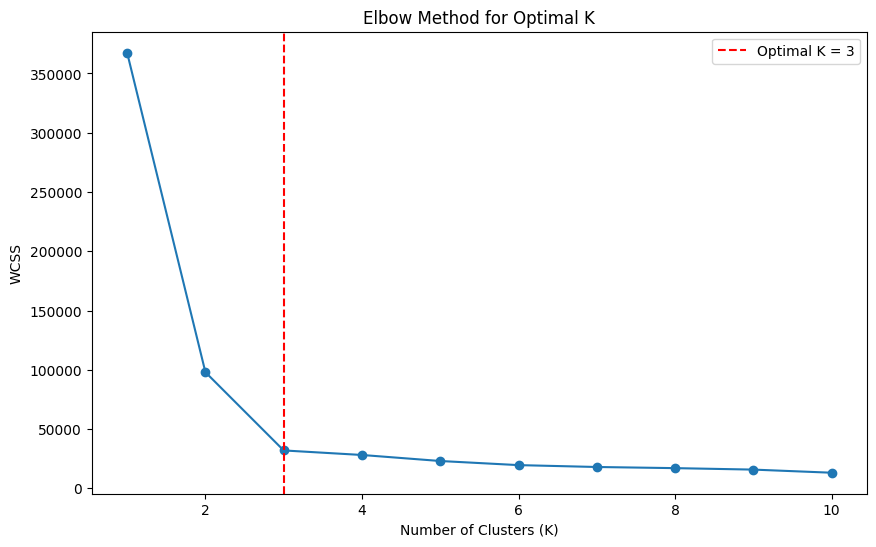

Optimal number of clusters (K): 3
miu: [[1.99934943 2.99957694]
 [4.99357771 8.00413313]
 [1.00101137 6.0011006 ]]
Covariance: [[[ 1.95834203e-01  3.61616066e-04]
  [ 3.61616066e-04  1.95895296e-01]]

 [[ 2.96144845e-01  7.69326488e-04]
  [ 7.69326488e-04  3.02289478e-01]]

 [[ 4.01701104e-01 -3.45959244e-03]
  [-3.45959244e-03  4.10040061e-01]]]
pi: [0.1963303  0.40448897 0.39918073]


In [9]:

means = [[2, 3], [5, 8], [1, 6]]
covariance = [[[0.2, 0], [0, 0.2]], [[0.3, 0], [0, 0.3]], [[0.4, 0], [0, 0.4]]]
weights = [0.2, 0.4, 0.4]
n_samples = 50000

samples = []
for _ in range(n_samples):
    k = np.random.choice(len(weights), p=weights)
    samples.append(np.random.multivariate_normal(means[k], covariance[k]))

samples = np.array(samples)
means, clusters = K_means(samples)  



# wcss = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(samples.reshape(-1, 1)) 
#     wcss.append(kmeans.inertia_)  # WCSS

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), wcss, marker='o')
# plt.title("Elbow Method for Optimal K")
# plt.xlabel("Number of Clusters (K)")
# plt.ylabel("WCSS")
# plt.show()

# ###############K-means#####################
# miu = np.array([[0.1,0.1], [0.3,0.3], [0.5,0.5]])  # Initial means
# i = 0
# while i < 15: 
#     m1, m2, m3 = [], [], []
#     for x in samples:
#         d0 = np.linalg.norm(x - miu[0])**2
#         d1 = np.linalg.norm(x - miu[1])**2
#         d2 = np.linalg.norm(x - miu[2])**2
#         if d0 < d1 and d0 < d2:
#             m1.append(x)
#         elif d1 < d0 and d1 < d2:
#             m2.append(x)
#         else:
#             m3.append(x)
#     # Update means (skip empty clusters)
#     new_miu = []
#     for m in [m1, m2, m3]:
#         if len(m) > 0:
#             new_miu.append(np.mean(m, axis=0))
#         else:
#             new_miu.append(np.random.uniform(0, 1, size=2))
#     miu = np.array(new_miu)
#     i += 1


# # After K-means, we have three clusters with their means
# plt.figure(figsize=(10, 6))
# plt.plot(np.array(m1)[:,0], np.array(m1)[:,1], 'r.', markersize=2, label='Cluster 1')
# plt.plot(np.array(m2)[:,0], np.array(m2)[:,1], 'g.', markersize=2, label='Cluster 2')
# plt.plot(np.array(m3)[:,0], np.array(m3)[:,1], 'b.', markersize=2, label='Cluster 3')
# plt.title("K-means Clustering Results")
# plt.legend()
# plt.show()

# Initialize pi and sigma
pi = np.array([len(cluster) / len(samples) for cluster in clusters])
miu = means
sigma = np.array([np.var(cluster) if len(cluster) > 0 else 0.1 for cluster in clusters])
sigma = np.sqrt(sigma)  
response = np.zeros((len(samples), len(pi)))

############EM Algorithm#####################
for _ in range(15):      

    ###########M-Step##############
    for j in range(len(pi)):
        rv = multivariate_normal(mean=miu[j], cov=sigma[j])
        response[:, j] = pi[j] * rv.pdf(samples)

    response /= response.sum(axis=1, keepdims=True)  # Normalize

    
    
    ########E-step###################333
    N_k = response.sum(axis=0)  # Sum of responsibilities for each cluster
    pi = N_k / len(samples)     

    # Update means
    miu = (response.T @ samples) / N_k[:, np.newaxis]

    # Update covariance matrices
    sigma = []
    for j in range(len(pi)):
        diff = samples - miu[j]
        weighted_sum = np.dot(response[:, j] * diff.T, diff) / N_k[j]
        sigma.append(weighted_sum)
    sigma = np.array(sigma)





print("miu:", miu)          
print("Covariance:", sigma)        
print("pi:", pi)
            

